## Lead Time Predection using Machine learning¶

# Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
xtree=ExtraTreesClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
from sklearn.decomposition import PCA

# Importing Datasets

In [3]:

train = pd.read_excel(r"D:\NIT 10AM\project\personal\machine-hack-delivery-time-prediction\Data_Train.xlsx")
test=pd.read_excel(r"D:\NIT 10AM\project\personal\machine-hack-delivery-time-prediction\Data_Test.xlsx")
sample=pd.read_excel(r"D:\NIT 10AM\project\personal\machine-hack-delivery-time-prediction\Sample_Submission.xlsx")

# Preprocesing the Data sets

In [4]:

train['Restaurant']=le.fit_transform(train['Restaurant'])
train['Location']=le.fit_transform(train['Location'])
train['Minimum_Order']=pd.to_numeric(train['Minimum_Order'].str.replace('₹',' '))
train['Average_Cost']=pd.to_numeric(train['Average_Cost'].str.replace('[^0-9]',''))
train['Rating']=pd.to_numeric(train['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
train['Votes']=pd.to_numeric(train['Votes'].apply(lambda x : np.nan if x=='-' else x))
train['Reviews']=pd.to_numeric(train['Reviews'].apply(lambda x : np.nan if x=='-' else x))
train['Delivery_Time']=pd.to_numeric(train['Delivery_Time'].str.replace('[^0-9]',''))

In [5]:
import numpy as np

# Define the columns to be processed
columns_to_process = ['Rating', 'Votes', 'Reviews', 'Average_Cost']

# Perform outlier treatment and missing value imputation
for column in columns_to_process:
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    
    # Outlier treatment
    train[column] = train[column].apply(lambda x: np.nan if x > q3 + 1.5 * iqr or x < q1 - 1.5 * iqr else x)
    
    # Missing value imputation
    if column == 'Reviews':
        train[column] = train[column].fillna(round(train[column].mean()))
    else:
        train[column] = train[column].fillna(train[column].mode()[0])


# Save the Processed data set for Future Deploymeny

In [6]:
#output=r"C:\Users\bhanu\Downloads\processed\train.csv"
#train.to_csv(output,index=False)

In [7]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [8]:
train_01=train.copy()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     11094 non-null  int32  
 1   Location       11094 non-null  int32  
 2   Cuisines       11094 non-null  object 
 3   Average_Cost   11094 non-null  float64
 4   Minimum_Order  11094 non-null  int64  
 5   Rating         11094 non-null  float64
 6   Votes          11094 non-null  float64
 7   Reviews        11094 non-null  float64
 8   Delivery_Time  11094 non-null  int64  
dtypes: float64(4), int32(2), int64(2), object(1)
memory usage: 693.5+ KB


In [10]:
train['Cuisines']=le.fit_transform(train['Cuisines'])

In [11]:
 # Assuming 'Delivery_Time' is the target column
x=train.drop('Delivery_Time',axis=1)
y=train['Delivery_Time']

In [12]:
# Apply the zscore to x
x=x.apply(zscore)

In [13]:
# SPlitting The Data into TEST and TRAIN
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## LazyPredict

In [14]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_train, y_train, y_train)  # Using the same data for training and testing to demonstrate
 # Assuming 'Delivery_Time' is the target column



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:09<00:00,  2.40s/it]


In [15]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
DecisionTreeClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
LabelPropagation                   1.00               1.00    None      1.00   
LabelSpreading                     0.99               0.98    None      0.99   
BaggingClassifier                  0.98               0.98    None      0.98   
QuadraticDiscriminantAnalysis      0.47               0.58    None      0.54   
LGBMClassifier                     0.81               0.47    None      0.81   
NearestCentroid                    0.33               0.45    None      0.43   
GaussianNB                         0.18 

## Implementing Text Analysis Using Count Vector

In [16]:
train_01.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.00,50,3.50,12.00,4.00,30
1,1785,30,"Ice Cream, Desserts",100.00,50,3.50,11.00,4.00,30
2,571,19,"Italian, Street Food, Fast Food",150.00,50,3.60,99.00,30.00,65
3,4708,28,"Mughlai, North Indian, Chinese",250.00,99,3.70,176.00,95.00,30
4,4896,26,"Cafe, Beverages",200.00,99,3.20,4.00,39.00,65


In [17]:
train_01['Cuisines']=train_01['Cuisines'].str.lower()
train_01['Cuisines']=train_01['Cuisines'].str.replace('[^a-z]',' ')

In [18]:
count.fit(train_01['Cuisines'])

CountVectorizer()

In [19]:
cols=['Restaurant','Location','Average_Cost','Minimum_Order','Rating','Votes','Reviews']

In [20]:
data=pd.concat([pd.DataFrame(zscore(train_01.drop(['Cuisines','Delivery_Time'],axis=1)),columns=cols),pd.DataFrame(count.transform(train_01['Cuisines']).todense())],axis=1)

In [21]:
x=data
y=train_01['Delivery_Time']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Convert feature names to strings
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7990387503754881

## Applying PCA for Dimensionality Reduction.

In [23]:
x=data
y=train_01['Delivery_Time']

In [24]:
x.shape

(11094, 115)

In [26]:
# Convert feature names to strings
x.columns = x.columns.astype(str)

pca = PCA()
pca.fit(x)


PCA()

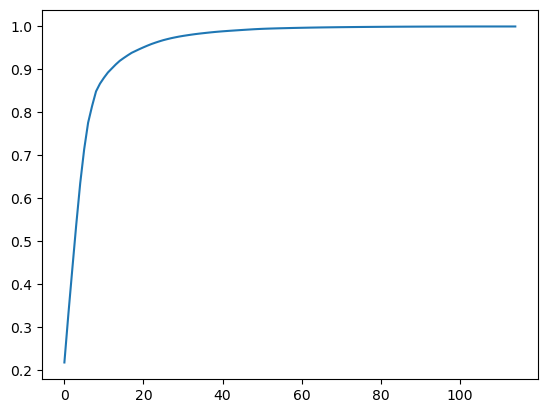

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [28]:
pca=PCA(n_components=22)

In [29]:
x=pca.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.7729047762090718


In [31]:
grid=GridSearchCV(rf,param_grid={'n_estimators':range(1,10)},return_train_score=1).fit(x_train,y_train)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, "{'n_estimators': 9}"),
  Text(0.0, 0, "{'n_estimators': 1}"),
  Text(1.0, 0, "{'n_estimators': 2}"),
  Text(2.0, 0, "{'n_estimators': 3}"),
  Text(3.0, 0, "{'n_estimators': 4}"),
  Text(4.0, 0, "{'n_estimators': 5}"),
  Text(5.0, 0, "{'n_estimators': 6}"),
  Text(6.0, 0, "{'n_estimators': 7}"),
  Text(7.0, 0, "{'n_estimators': 8}"),
  Text(8.0, 0, "{'n_estimators': 9}"),
  Text(9.0, 0, '')])

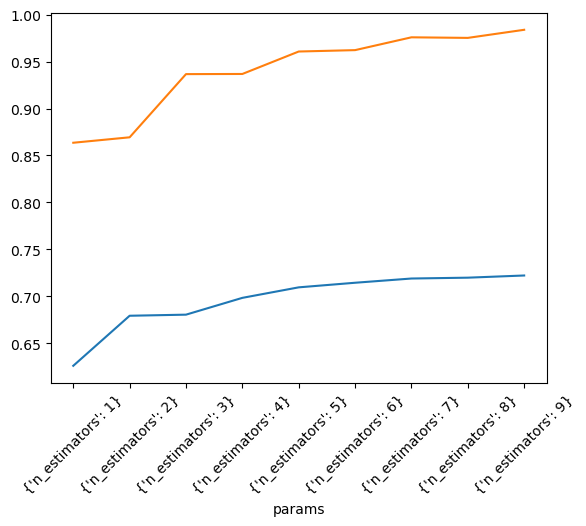

In [32]:
pd.DataFrame(grid.cv_results_).set_index('params')['mean_test_score'].plot.line()
pd.DataFrame(grid.cv_results_).set_index('params')['mean_train_score'].plot.line()
plt.xticks(rotation=45)

## Checking on Test Dataset

In [33]:
test['Restaurant']=le.fit_transform(test['Restaurant'])
test['Location']=le.fit_transform(test['Location'])
test['Minimum_Order']=pd.to_numeric(test['Minimum_Order'].str.replace('₹',' '))
test['Average_Cost']=pd.to_numeric(test['Average_Cost'].str.replace('[^0-9]',''))
test['Rating']=pd.to_numeric(test['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
test['Votes']=pd.to_numeric(test['Votes'].apply(lambda x : np.nan if x=='-' else x))
test['Reviews']=pd.to_numeric(test['Reviews'].apply(lambda x : np.nan if x=='-' else x))
test['Rating']=test['Rating'].fillna(test['Rating'].median())
test['Votes']=test['Votes'].fillna(test['Votes'].mode()[0])
test['Reviews']=test['Reviews'].fillna(test['Reviews'].median())
test['Average_Cost']=test['Average_Cost'].fillna(test['Average_Cost'].mean())
sample['Delivery_Time']=le.fit_transform(pd.to_numeric(sample['Delivery_Time'].str.replace('[^0-9]','')))

In [34]:
test['Cuisines']=test['Cuisines'].str.lower()
test['Cuisines']=test['Cuisines'].str.replace('[^a-z]',' ')

In [36]:
output=r"D:\NIT 10AM\project\personal\machine-hack-delivery-time-prediction\Deployment\test.csv"
test.to_csv(output,index=False)

In [37]:
count.fit(test['Cuisines'])

In [38]:
pca=PCA(n_components=22)

In [39]:
data=pd.concat([pd.DataFrame(zscore(test.drop(['Cuisines'],axis=1)),columns=cols),pd.DataFrame((count.transform(test['Cuisines']).todense()))],axis=1)

In [40]:
data.head()

# Convert feature names to strings

In [41]:
# Convert feature names to strings
data.columns = data.columns.astype(str)
 
pca = PCA()
x = pca.fit_transform(data)

# Predict the Model

In [42]:
data['Delivery_Time'] = pd.DataFrame(rf.predict(x_test))

In [43]:
data['Delivery_Time'].value_counts()

# Saving the model Inputs and Outputs

In [44]:
sample_refined=[]
for i in data['Delivery_Time']:
    i=(str(i)+' minutes')
    sample_refined.append(i)

In [45]:
sample_refined=pd.DataFrame(sample_refined,columns=['Delivery_Time'])
sample_refined.to_excel('Lead_Time_Predict.xlsx',index=False)

In [46]:
pd.read_excel('Lead_Time_Predict.xlsx')['Delivery_Time'].value_counts()

# Now write Deployment code for deployent

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train = pd.read_csv(r"D:\NIT 10AM\project\personal\machine-hack-delivery-time-prediction\Deployment\train.csv")
test = pd.read_csv(r"D:\NIT 10AM\project\personal\machine-hack-delivery-time-prediction\Deployment\test.csv")


train['Cuisines'] = le.fit_transform(train['Cuisines'])

x = train.drop('Delivery_Time', axis=1)
y = train['Delivery_Time']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

st.title("LEAD TIME PREDICTION")

train.sort_values("Reviews").head()


def user_report():
    Restaurant = st.sidebar.number_input('Restaurant')
    Location = st.sidebar.slider('Location', 0, 34)
    Cuisines = st.sidebar.slider('Cuisines', 0, 2175)
    Average_Cost = st.sidebar.slider('Average_Cost', 50, 500)
    Minimum_Order = st.sidebar.slider('Minimum_Order', 0, 500)
    Rating = st.sidebar.slider('Rating', 1, 5)
    Votes = st.sidebar.slider('Votes', 1, 600)
    Reviews = st.sidebar.slider('Reviews', 1, 500)

    user_report = {
        'Restaurant': Restaurant,
        'Location': Location,
        'Cuisines': Cuisines,
        'Average_Cost': Average_Cost,
        'Minimum_Order': Minimum_Order,
        'Rating': Rating,
        'Votes': Votes,
        'Reviews': Reviews
    }

    report_data = pd.DataFrame(user_report, index=[0])
    return report_data


user_data = user_report()

user_result = rf.predict(user_data)

st.subheader("DELIVERY TIME")
st.write("MINIMUN DELIVERY 30 MINUTES")

st.write(str(user_result)+ 'MIN') 